In [5]:
import sys
sys.path.insert(0, '..')
from assignment4.train import *
from assignment4.utils import get_seqs_from_file,get_genes_from_file

In [2]:
emmisionP = pd.DataFrame([ [0.25]*4, 
                            [0.2,0.3,0.3,0.2] ], 
                            index = ['State 1','State 2'], columns = list('ACGT'))
transitionP = pd.DataFrame([[0.9999, 0.0001],
                            [0.9999,0.0001], 
                            [0.01, 0.99]], 
                            columns = ['State 1','State 2'], index = ['Begin','State 1','State 2'])

sequence_all = get_seqs_from_file('../data/GCF_000091665.1_ASM9166v1_genomic.fna')[0]

k = 10

pseudo_count = 0.1

In [37]:
print(f'Length of the DNA is {len(sequence_all)}')
print(sequence_all[:50], '.....', sequence_all[-50:])

sequence = sequence_all

Length of the DNA is 1664970
TACATTAGTGTTTATTACATTGAGAAACTTTATAATTAAAAAAGATTCAT ..... ATAATTTACGTTGCTAATTTTATTATCCGTAGGGCATTAATAATTAGAGC


## Train

I have used pseudo_count of 0.1 to avoid zero probability and log(0) values in viterbi algorithm. Different values of this hyper parameter might result in slightly different results.

In [38]:
total_iter = 10

import time

start = time.time()

path = None

trainer = ViterbiTrain(sequence, emmisionP, transitionP, 'Begin', pseudo_count, debug = False)

for i in range(total_iter + 1):
    print(f'\n\n************** Iteration {i} ************')
    print('_______________________________________\n')
    
    start_viterbi = time.time()
    path, v_all = trainer.expectation()
    end_viterbi = time.time()
    print(f'\n***Viterbi time iteration {i} = {end_viterbi-start_viterbi} seconds')
    trainer.viterbi.print(v_all, hit_state = 'State 2', path = path.copy(), k = 10 if i <10 else 0)
    if i < total_iter:
        trainer.maximization(path)

end = time.time()
print(f'Total time taken = {end-start} seconds')



************** Iteration 0 ************
_______________________________________


***Viterbi time iteration 0 = 40.57531952857971 seconds
Emission Probability


,A,C,G,T
State 1,0.25,0.25,0.25,0.25
State 2,0.20,0.30,0.30,0.20



Transition Probability


,State 1,State 2
Begin,0.9999,0.0001
State 1,0.9999,0.0001
State 2,0.0100,0.9900



Log probability of viterbi path=  -2308117.25052

hits


,state,start,end,length
1,State 2,154651,159579,4929
2,State 2,638464,643447,4984




************** Iteration 1 ************
_______________________________________


***Viterbi time iteration 1 = 39.51424789428711 seconds
Emission Probability


,A,C,G,T
State 1,0.345353,0.154403,0.157978,0.342266
State 2,0.186626,0.314635,0.313828,0.184911



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999999,0.000001
State 2,0.000212,0.999788



Log probability of viterbi path=  -2188056.06471

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,138345,138419,75
5,State 2,154610,159591,4982
6,State 2,186974,187067,94
7,State 2,190831,190907,77
8,State 2,215200,215296,97
9,State 2,303990,304080,91
10,State 2,358766,358942,177




************** Iteration 2 ************
_______________________________________


***Viterbi time iteration 2 = 37.84396171569824 seconds
Emission Probability


,A,C,G,T
State 1,0.345743,0.154033,0.157588,0.342635
State 2,0.187626,0.310809,0.313583,0.187982



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999986,0.000014
State 2,0.001643,0.998357



Log probability of viterbi path=  -2187965.99812

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 3 ************
_______________________________________


***Viterbi time iteration 3 = 37.66996645927429 seconds
Emission Probability


,A,C,G,T
State 1,0.345818,0.153956,0.157513,0.342713
State 2,0.184941,0.313826,0.316361,0.184872



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999979,0.000021
State 2,0.002337,0.997663



Log probability of viterbi path=  -2187960.60601

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 4 ************
_______________________________________


***Viterbi time iteration 4 = 41.36337208747864 seconds
Emission Probability


,A,C,G,T
State 1,0.345824,0.153951,0.157502,0.342723
State 2,0.185215,0.313457,0.316727,0.184601



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999979,0.000021
State 2,0.002392,0.997608



Log probability of viterbi path=  -2187960.5684

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 5 ************
_______________________________________


***Viterbi time iteration 5 = 35.364969968795776 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 6 ************
_______________________________________


***Viterbi time iteration 6 = 25.20718479156494 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 7 ************
_______________________________________


***Viterbi time iteration 7 = 20.085286378860474 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 8 ************
_______________________________________


***Viterbi time iteration 8 = 37.941049337387085 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 9 ************
_______________________________________


***Viterbi time iteration 9 = 39.82680892944336 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97




************** Iteration 10 ************
_______________________________________


***Viterbi time iteration 10 = 38.063764333724976 seconds
Emission Probability


,A,C,G,T
State 1,0.345829,0.153953,0.15749,0.342728
State 2,0.184887,0.312970,0.31780,0.184343



Transition Probability


,State 1,State 2
Begin,0.999900,0.000100
State 1,0.999978,0.000022
State 2,0.002456,0.997544



Log probability of viterbi path=  -2187960.50709

hits


,state,start,end,length
1,State 2,97326,97541,216
2,State 2,97627,97823,197
3,State 2,111764,111856,93
4,State 2,118079,118179,101
5,State 2,138345,138419,75
6,State 2,154610,157697,3088
7,State 2,157782,159591,1810
8,State 2,186974,187067,94
9,State 2,190831,190907,77
10,State 2,215200,215296,97


Total time taken = 413.2579867839813 seconds


## Evaluate
Q: For the first 10 hits longer than 50 bp from the 10th pass, look at the genome annotation :

In [39]:
hits = trainer.viterbi.get_hits(path)
hits = hits[hits.state == 'State 2'].reset_index(drop=True)

import pickle
with open('hits.pandas', 'wb') as f:
    pickle.dump(hits, f)


In [1]:
import pickle
with open('hits.pandas', 'rb') as f:
    hits = pickle.load(f)

Since the requirement was to only analyze hits longer than 50 bp, only hits with length >100 are filtered out below.

In [3]:
print('Table 1: First 10 hits longer than 50 bp from the 10th pass:' )
hits_gt50bp = hits[hits.length > 50*2]
df = hits_gt50bp.head(10).reset_index(drop = True) 
display(df)

Table 1: First 10 hits longer than 50 bp from the 10th pass:


,state,start,end,length
0,State 2,97326,97541,216
1,State 2,97627,97823,197
2,State 2,118079,118179,101
3,State 2,154610,157697,3088
4,State 2,157782,159591,1810
5,State 2,358766,358942,177
6,State 2,552537,552862,326
7,State 2,637579,638153,575
8,State 2,638334,640132,1799
9,State 2,640217,643449,3233


In [6]:
genepos = get_genes_from_file('../data/GCF_000091665.1_ASM9166v1_genomic.gff')
genepos = pd.DataFrame(genepos, columns = ['start', 'end'])
genepos['length'] = genepos['end'] - genepos['start']
print('Table 2 :top 30 gold gene positions:')
display(genepos.head(30))


Table 2 :top 30 gold gene positions:


,start,end,length
0,97426,97537,111
1,97629,97716,87
2,111766,111854,88
3,138344,138419,75
4,154662,157639,2977
5,157847,157919,72
6,157984,159463,1479
7,186978,187066,88
8,190832,190908,76
9,215210,215297,87


## Find match based on overlap

In [8]:
from assignment4.utils import find_overlap
overlap_lengths, overlap_genes= find_overlap(hits_gt50bp.head(10), genepos)
df['percentage_overlap'] = np.array(overlap_lengths/ df.length)*100
df['overlaps'] =overlap_genes
df['match'] = df['percentage_overlap'] >50
print("Table 3: Percentage overlap - predicted gene (> 50bp) vs gold genes")
display(df)

Table 3: Percentage overlap - predicted gene (> 50bp) vs gold genes


,state,start,end,length,percentage_overlap,overlaps,match
0,State 2,97326,97541,216,51.851852,"[[97426, 97537]]",True
1,State 2,97627,97823,197,44.670051,"[[97629, 97716]]",False
2,State 2,118079,118179,101,0.000000,[],False
3,State 2,154610,157697,3088,96.437824,"[[154662, 157639]]",True
4,State 2,157782,159591,1810,85.801105,"[[157847, 157919], [157984, 159463]]",True
5,State 2,358766,358942,177,85.875706,"[[358768, 358845], [358869, 358943]]",True
6,State 2,552537,552862,326,96.932515,"[[552541, 552856]]",True
7,State 2,637579,638153,575,81.043478,"[[637583, 637659], [637667, 637742], [637772, ...",True
8,State 2,638334,640132,1799,86.492496,"[[638448, 639930], [639995, 640067]]",True
9,State 2,640217,643449,3233,95.731519,"[[640275, 643254], [643333, 643447]]",True


Matches with 50% overlap threshold with gold positions :

### Observation
1. From the percentage overlap of  predicted genes with gold genes , it is evident that the HMM model with viterbi traning was able to predict 7/10 gene positions with more than 80% overlap. 

2. Position 118079 to 118179 (index 2 in above table)	is the only false positive and has no overlap. Genes at index 0 and 1 also have very small overlap. 

3. For prediction at index 0, the predicted position starts 50 bp before the actual gene position but ends at a position newar to the actual non-coding gene. 

4. For prediction at index 1, the prediction starts at relatively same position as the gold label but ends more than 50 bp after the actual end position. 

5. Most of the predictions struggle finding exact start and end position for that gene. For long predictions, the overlap is relatively high because of high margin of error. 

6. Some Predictions(4,5,7,8,9) tend to conflate closely-spaced RNAs by one prediction

### Plot

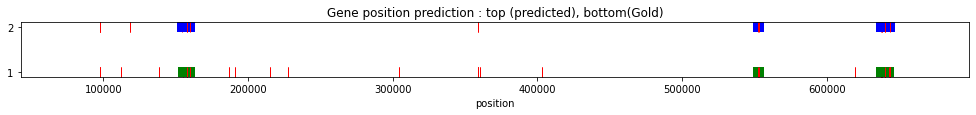

In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
fig.set_figwidth(17)
fig.set_figheight(1)
for s,e in df[['start','end']].values:
    ax.plot([s,e],[2,2], linewidth=10,  color = 'blue', marker='|', markeredgecolor='red', markersize=10)

for s,e in genepos[['start', 'end']].values:
    if s < 650000:
        ax.plot([s,e],[1,1], linewidth=10, marker='|', color = 'green', markeredgecolor='red', markersize=10)

ax.set_title('Gene position prediction : top (predicted), bottom(Gold)')
ax.set_xlabel('position')
ax.margins(0.1) 
plt.show()